# **Submission 02 - Bike Sharing Dataset - Time Series**
### **Nur Imam Masri**
### **nurimammasri.01@gmail.com**

# **Import Library**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
plt.style.use('seaborn')

# **Data Loading**

**Bike Sharing Dataset Data Set**

[BBC News Archive](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

**Data Set Information:**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


**Attribute Information:**

Both `hour.csv` and `day.csv` have the following fields, except hr which is not available in day.csv

- `instant`: record index
- `dteday` : date
- `season` : season (1:winter, 2:spring, 3:summer, 4:fall)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from [Web Link])
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered






Data yang digunakan berasal dari Dataset dari kaggle yang memiliki dataset:

* hours.csv

**use kaggle API**

**Download dataset from Kaggle**

In [3]:
# # install kaggle package
# !pip install -q kaggle

In [4]:
# # upload kaggle.json
# from google.colab import files
# files.upload()

In [5]:
# # make directory and change permission
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle

In [6]:
# # test kaggle dataset list
# !kaggle datasets list

In [7]:
# # download dataset, choose 'copy api command' from kaggle dataset
# !kaggle datasets download -d marklvl/bike-sharing-dataset

In [8]:
# # unzip
# !mkdir bikesharingdataset
# !unzip bike-sharing-dataset.zip -d bikesharingdataset
# !ls bikesharingdataset

In [9]:
# import pandas as pd
# df_bike = pd.read_csv('bikesharingdataset/hour.csv')
# df_bike.head()

**use by link**

In [10]:
import pandas as pd
df_bike = pd.read_csv('https://drive.google.com/uc?id=1_Z8wZ8LBgFGVSCe9L55cA_uwSiXZzElU')
df_bike = df_bike[['dteday', 'cnt']]
df_bike.head()

,dteday,cnt
0,2011-01-01,16
1,2011-01-01,40
2,2011-01-01,32
3,2011-01-01,13
4,2011-01-01,1


**change column name**

In [11]:
df_bike.columns = ['date', 'count']

In [12]:
df_bike.min()

date     2011-01-01
count             1
dtype: object

In [13]:
df_bike.max()

date     2012-12-31
count           977
dtype: object

Menampilkan daftar columns

In [14]:
df_bike.columns

Index(['date', 'count'], dtype='object')

Ada 17379 baris data yang berarti ada 17379 per date

2 kolom yang berarti 2 columns (Features)

In [15]:
# the shape of data
print('Total Row:', df_bike.shape[0])
print('Total Columns:', df_bike.shape[1])
df_bike.shape

Total Row: 17379
Total Columns: 2


(17379, 2)

Melihat keseluruhan profile data, dapat dilihat tidak ada data null dari 17379 data, serta sebagian data memiliki nilai berupa numerik selain Date

In [16]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    17379 non-null  object
 1   count   17379 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 271.7+ KB


In [17]:
df_bike.describe()

,count
count,17379.000000
mean,189.463088
std,181.387599
min,1.000000
25%,40.000000
50%,142.000000
75%,281.000000
max,977.000000


# **Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


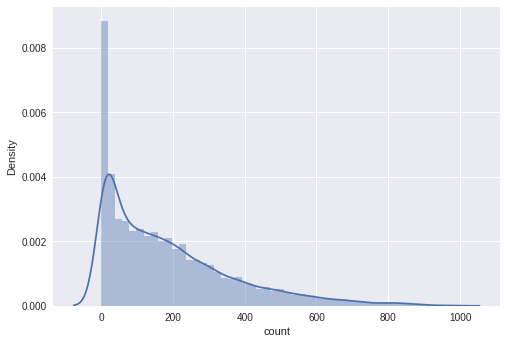

In [18]:
sns.distplot(df_bike['count'], bins=50)
plt.show()

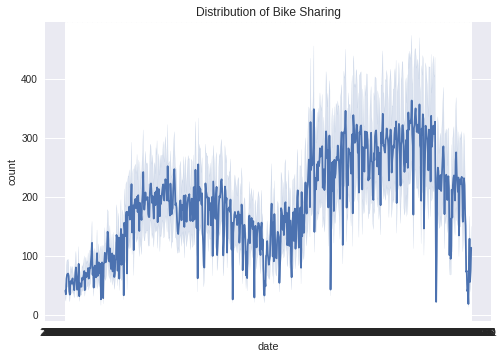

In [19]:
sns.lineplot(data=df_bike, x="date", y="count")
plt.title("Distribution of Bike Sharing")
plt.show()

In [20]:
bike=df_bike[['date','count']].copy()
bike['date'] = pd.to_datetime(bike['date'])

bike.set_index('date', inplace= True)
bike.head()

,count
date,
2011-01-01,16
2011-01-01,40
2011-01-01,32
2011-01-01,13
2011-01-01,1


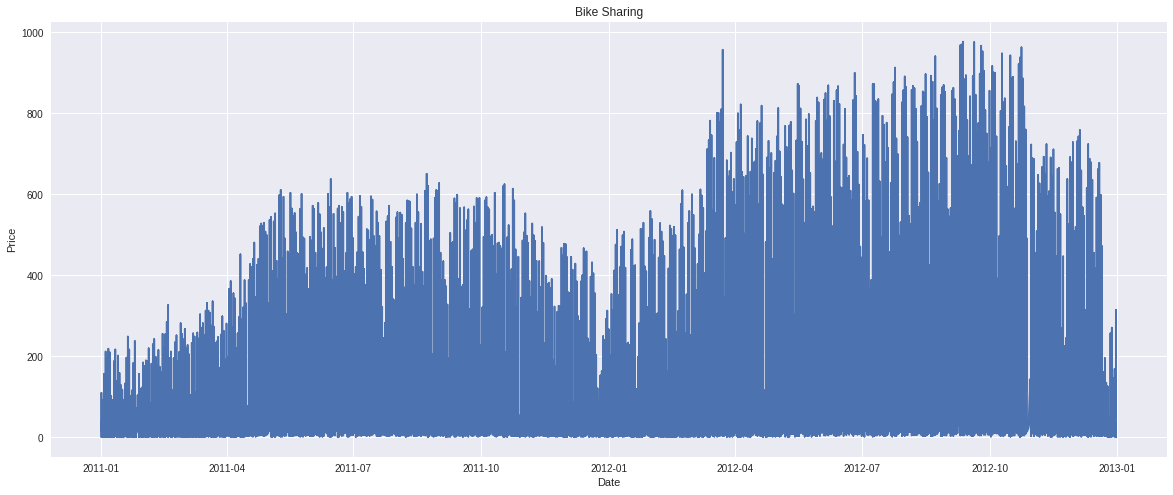

In [21]:
plt.figure(figsize=(20,8))
plt.plot(bike)
plt.title('Bike Sharing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Tidak ada outliers

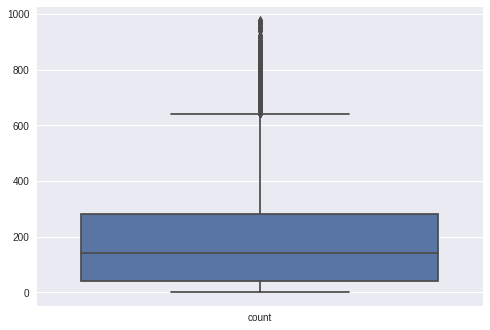

In [22]:
sns.boxplot(data=df_bike)
plt.show()

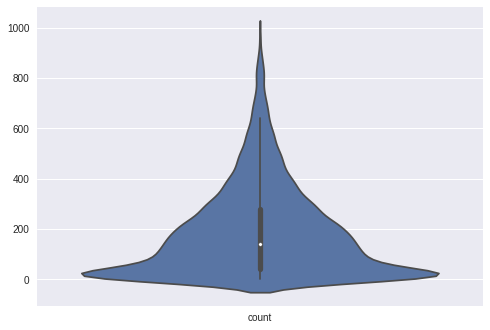

In [23]:
sns.violinplot(data=df_bike)
plt.show()

# **Data Preprocessing**

In [24]:
df_bike.head(3)

,date,count
0,2011-01-01,16
1,2011-01-01,40
2,2011-01-01,32


**Handling Missing Value**

Untuk mengefektifkan model dalam mempelajari data dilakukan cleaning data dari missing value. Namun dari pengecekan data tidak memiliki missing value.

In [25]:
df_bike.isnull().any()

date     False
count    False
dtype: bool

In [26]:
df_bike.isna().any()

date     False
count    False
dtype: bool

**Outlier Analysis**

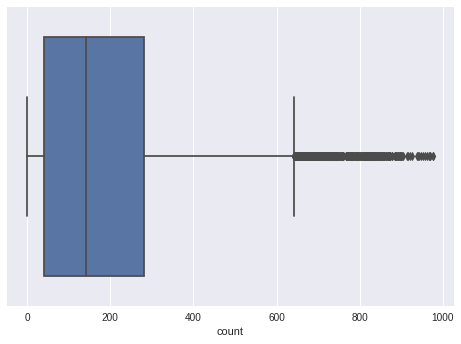

In [27]:
sns.boxplot(x=df_bike['count'])

In [28]:
Q1 = df_bike.quantile(0.25)
Q3 = df_bike.quantile(0.75)
print(Q1)
print(Q3)

count    40.0
Name: 0.25, dtype: float64
count    281.0
Name: 0.75, dtype: float64


In [29]:
IQR = Q3 - Q1
print(IQR)

count    241.0
dtype: float64


In [30]:
outlier = (df_bike < (Q1-1.5*IQR)) | (df_bike > (Q3+1.5*IQR))
pd.set_option('display.max_rows', outlier.shape[0]+1)
outlier

,count,date
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [31]:
df_bike_out = df_bike[~((df_bike < (Q1-1.5*IQR))|(df_bike>(Q3+1.5*IQR))).any(axis=1)]
df_bike_out.shape

(16874, 2)

**Scaling / Normalization**

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mx = MinMaxScaler()

In [34]:
df_bike['count'] = mx.fit_transform(df_bike[['count']])
df_bike

Output hidden; open in https://colab.research.google.com to view.

**Split Data**

Selanjutnya dilakukan ektraksi data.

Maka kita tinggal mengektraksi label dan featuresnya

Prepare Feature and Label

* `feature` data set biasa disebut independent data set (X), yakni columns

* `target` data set also known as the dependent data set (Y)

Kemudian selanjutnya akan di split antara data training dan data testing

In [35]:
dates = df_bike['date'].values
prices = df_bike['count'].values

In [36]:
dates

array(['2011-01-01', '2011-01-01', '2011-01-01', ..., '2012-12-31',
       '2012-12-31', '2012-12-31'], dtype=object)

In [37]:
prices

array([0.01536885, 0.03995902, 0.0317623 , ..., 0.09118852, 0.06147541,
       0.04918033])

Lalu, bagi data untuk training dan data untuk testing, dengan presentasi 80% Training set dan 20% Validation set.

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dates, prices, test_size = 0.2, random_state = 0 , shuffle=False)

In [39]:
print(len(x_train), len(x_test))

13903 3476


In [40]:
x_train.shape

(13903,)

In [41]:
x_train

array(['2011-01-01', '2011-01-01', '2011-01-01', ..., '2012-08-07',
       '2012-08-07', '2012-08-07'], dtype=object)

**Windowed**

In [42]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [43]:
data_x_train = windowed_dataset(y_train, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(y_test, window_size=60, batch_size=100, shuffle_buffer=5000)

# **Data Modelling**

In [44]:
from keras.layers import Dense, LSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(256, return_sequences=True),
  tf.keras.layers.LSTM(256),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

Selanjutnya kita buat kelas callback. fungsi yang paling penting yaitu `on_epoch_end()`. Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Kode `self.model.stop_training = True` adalah kode yang memberi tahu model untuk menghentikan pelatihan.

In [45]:
max = df_bike['count'].max()
print('Max value : ' )
print(max)

Max value : 
1.0


In [46]:
min = df_bike['count'].min()
print('Min Value : ')
print(min)

Min Value : 
0.0


In [47]:
x = (max - min) * 0.1
print(x)

0.1


In [48]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < x and logs.get('val_mae') < x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [49]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
history = model.fit(
    data_x_train,
    epochs=100,  
    validation_data=(data_x_test), 
    verbose=2, 
    callbacks=[callbacks]
)

Epoch 1/100
139/139 - 139s - loss: 0.0267 - mae: 0.1626 - val_loss: 0.0468 - val_mae: 0.2200
Epoch 2/100


**Plot Loss dan MAE**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()